<a href="https://colab.research.google.com/github/beabarcelos/beabarcelos/blob/master/Titanic_Machine%20Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


 - Importando Bibliotecas

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
path = 'drive//My Drive//train.csv'
df = pd.read_csv(path)

- Conhecenho o dataset através de visualizações

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


 - Utilizando o Heatmap, iremos destacar os valores nulos


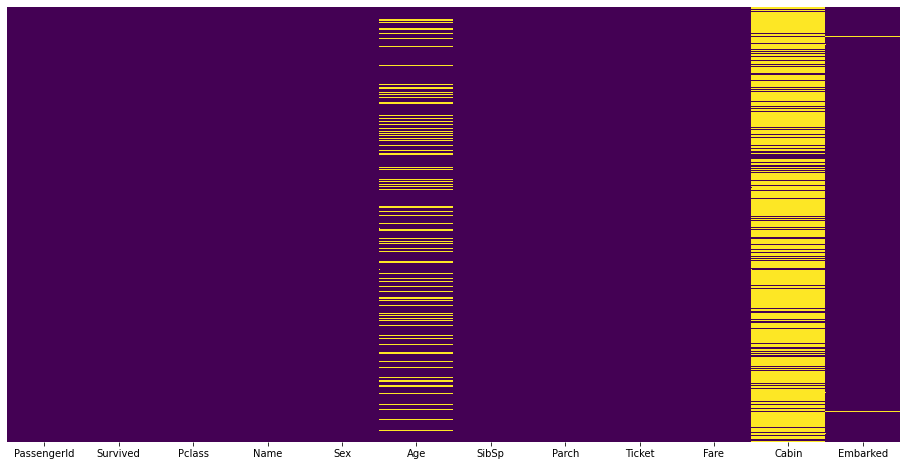

In [15]:
plt.figure(figsize=(16,8))
sns.heatmap(df.isnull(), yticklabels = False, cmap = 'viridis', cbar= False)

- Cruzamento de dados

- Mortos e Sobreviventes X Sexo

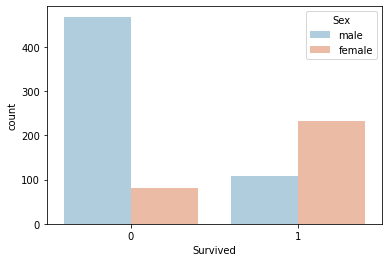

In [16]:
sns.countplot(x = 'Survived', data = df, hue='Sex', palette='RdBu_r')

- Mortos e Sobreviventes X Classe

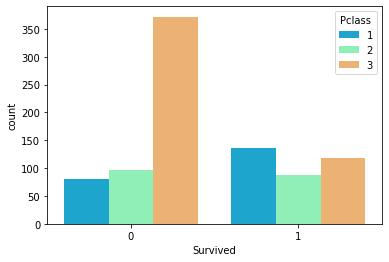

In [17]:
sns.countplot(x='Survived', data = df, hue='Pclass', palette='rainbow')

- Concentração de pessoas X Idade

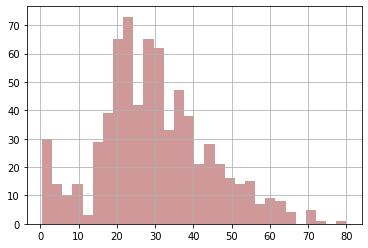

In [20]:
df['Age'].hist(bins = 30, color='darkred', alpha=0.4)

- Quantidade de acompanhante X Pessoa

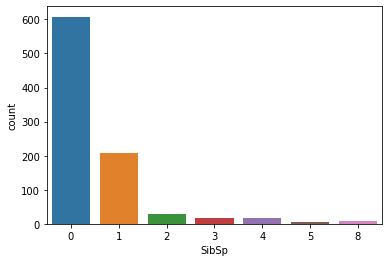

In [21]:
sns.countplot(x='SibSp', data = df)

- Faixa Etária X Classe

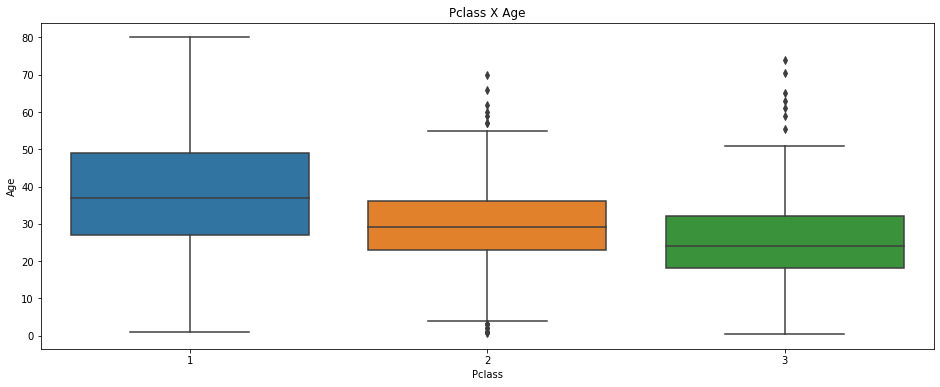

In [23]:
plt.figure(figsize=(16,6))
plt.title('Pclass X Age')
sns.boxplot(x='Pclass', y='Age', data = df)

In [24]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- Média exata das idades X Classe

In [26]:
df[df['Pclass'] == 1]['Age'].mean()

38.233440860215055

In [27]:
df[df['Pclass'] == 2]['Age'].mean()

29.87763005780347

In [28]:
df[df['Pclass'] == 3]['Age'].mean()

25.14061971830986

- Tratamento de dados

In [33]:
def Muda_Idade(cols):
  idade = cols[0]
  classe = cols[1]

  if pd.isnull(idade):
    if classe == 1:
      return 38
    elif classe == 2:
      return 29
    else:
      return 25
  else:
    return idade

In [34]:
df['Age'] = df[['Age', 'Pclass']].apply(Muda_Idade, axis = 1)

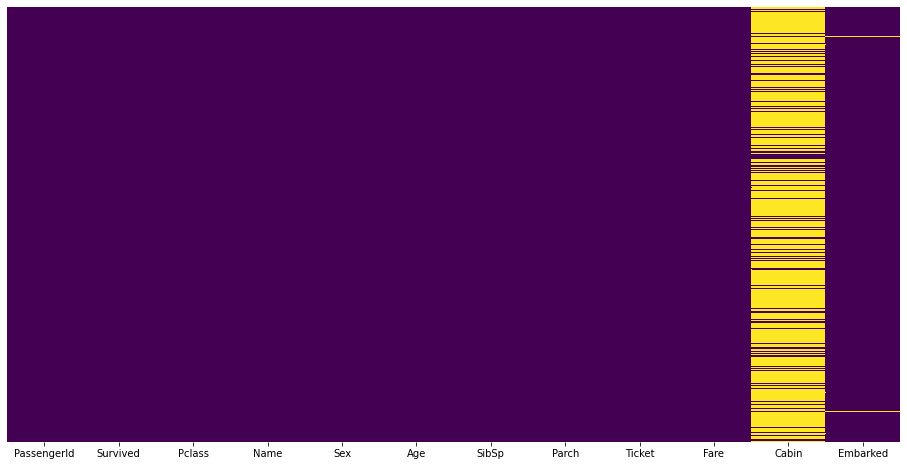

In [35]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.isnull(), yticklabels = False, cmap = 'viridis', cbar= False)

In [36]:
del df['Cabin']

In [37]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


- Repesentação dos dados após a exclusão da coluna "Cabin"

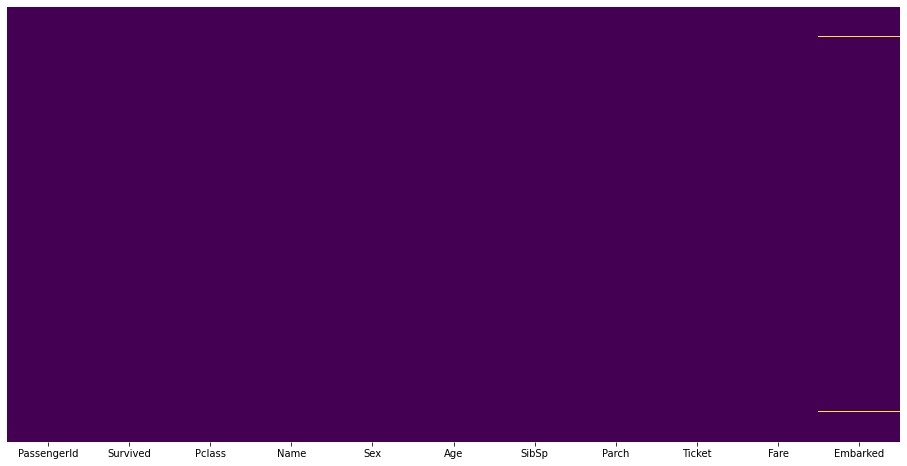

In [38]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.isnull(), yticklabels = False, cmap = 'viridis', cbar= False)

In [39]:
del df['Embarked']

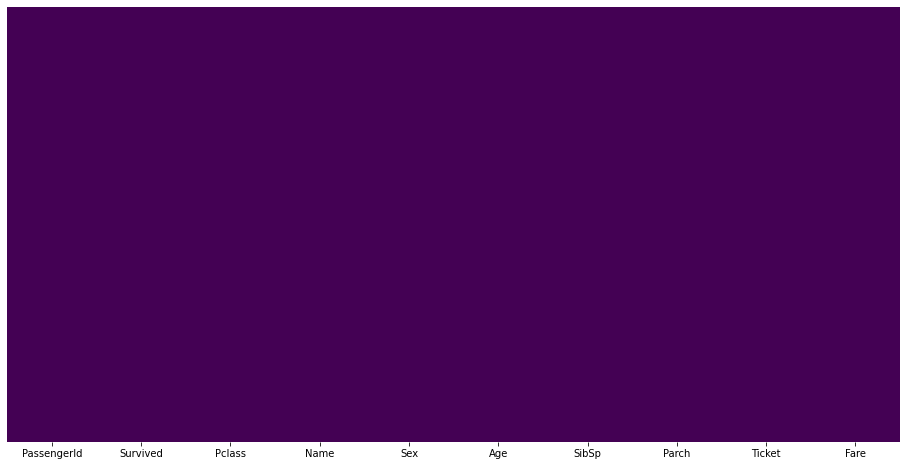

In [40]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.isnull(), yticklabels = False, cmap = 'viridis', cbar= False)

- Mudando os dados de Sexo para Binário

Função para mudança de string p/ valor binário

In [41]:
def muda_sex(col):
  sex = col[0]

  if sex == 'male':
    return 0
  else:
    return 1

In [42]:
df['Sex'] = df[['Sex']].apply(muda_sex, axis=1)

Representação dos dados após tratamento

In [43]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500


In [44]:
del df['Name']

In [45]:
del df['Ticket']

In [46]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,0,22.0,1,0,7.2500
1,2,1,1,1,38.0,1,0,71.2833
2,3,1,3,1,26.0,0,0,7.9250
3,4,1,1,1,35.0,1,0,53.1000
4,5,0,3,0,35.0,0,0,8.0500


- Machine Learning

Train test split divide os dados em uma tupla com 4 elementos

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
from sklearn.model_selection import train_test_split

Com o drop dificulto o acesso do computador a informação de sobrevivente:

In [62]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived', axis=1), df['Survived'], test_size = 0.3)

In [63]:
logmodel = LogisticRegression()

Logmodel é meu objeto utilizado para o treino

In [64]:
logmodel.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
predictions = logmodel.predict(X_test)

Modelo de Machine Learning aplicado, a seguir as métricas (quanto o computador errou e acertou)

In [66]:
from sklearn.metrics import classification_report

O y_test é usado para comparar

In [67]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       178
           1       0.70      0.67      0.68        90

    accuracy                           0.79       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.79      0.79      0.79       268

